In [41]:
import tensorflow as tf
import os
dataset='training'
dataset_val='validation'
bread_train=os.path.join(dataset,'Bread')
dairy_product_train=os.path.join(dataset,"Dairy product")
dessert_train=os.path.join(dataset,"Dessert")
egg_train=os.path.join(dataset,'Egg')
fried_food_train=os.path.join(dataset,"Fried food")
meat_train=os.path.join(dataset,"Meat")
noodles_pasta_train=os.path.join(dataset,"Noodles-Pasta")
rice_train=os.path.join(dataset,"Rice")
seafood_train=os.path.join(dataset,"Seafood")
soup_train=os.path.join(dataset,'Soup')
vegetable_train=os.path.join(dataset,"Vegetable-Fruit")
                           
                           
                           

In [42]:
print(len(os.listdir(bread_train)))
print(len(os.listdir(dairy_product_train)))
print(len(os.listdir(dessert_train)))
print(len(os.listdir(egg_train)))
print(len(os.listdir(fried_food_train)))
print(len(os.listdir(meat_train)))
print(len(os.listdir(noodles_pasta_train)))
print(len(os.listdir(rice_train)))
print(len(os.listdir(seafood_train)))
print(len(os.listdir(soup_train)))
print(len(os.listdir(vegetable_train)))



994
429
1500
986
848
1325
440
280
855
1500
709


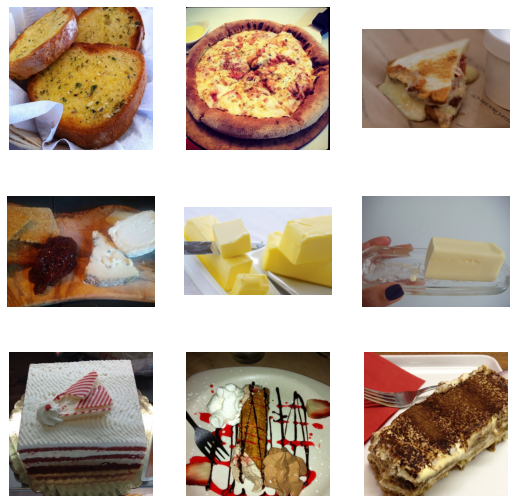

In [4]:
import matplotlib.pyplot as plt #mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows=3 # jumlah baris tampilan gambar
ncols=3 #jumlah kolom tampilan gambar

pic_index=0 #index awal untuk iterasi gambar

fig=plt.gcf()
fig.set_size_inches(ncols*3,nrows*3) #mengatur gambar output matplotlib
#gambr tampil kertas
gambr_bread=[]
for fname in os.listdir(bread_train)[0:3]:
  gambr_bread.append(os.path.join(bread_train,fname)) #menmapung file kertas sesuai index

#gambar tampil batu
gambr_dairy_product=[]
for fname in os.listdir(dairy_product_train)[0:3]:
  gambr_dairy_product.append(os.path.join(dairy_product_train,fname)) #menmapung file batu sesuai index


gambr_dessert_train=[]
for fname in os.listdir(dessert_train)[0:3]:
  gambr_dessert_train.append(os.path.join(dessert_train,fname)) #menmapung file batu sesuai index

for i,img_path in enumerate(gambr_bread+gambr_dairy_product+gambr_dessert_train):
  sp=plt.subplot(nrows,ncols,i+1) #mengatur subplot dan indeknya mulai dari 1
  sp.axis('off') #tidak menmapilkan gridlines

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
import keras.preprocessing #import modul keras

from keras.preprocessing.image import ImageDataGenerator #mengimport processing untuk gambar

In [43]:
DATABSE_IMAGE_train=dataset #meyiapkan folder utama
DATABSE_IMAGE_val=dataset_val

In [44]:
training_datagen=ImageDataGenerator(
    #proses augmentasi:
    rescale=1./255, #menormalisasi data
    rotation_range=15, #menerapkan skenario rotasi gambar hingga 15 derajat
    width_shift_range=0.2,#menerapkan skenario pelebaran gambar hingga sebnayak 0.2 dari ukuran asli
    height_shift_range=0.2,#menerapkan skenario peninggian gambar hingga sebnayak 0.2 dari ukuran asli
    shear_range=0.2, #menerapkan skenario pemangkasan gambar hingga sebnayak 0.3 dari ukuran asli
    zoom_range=0.2, #menerapkan skenario zoom gambar hingga sebnayak 0.2 dari ukuran asli
    fill_mode='nearest',#mengisi piksel yang kosong dengan nilai piksel terdekat
     # un tuk memencah data menajdi tyarining dan test
)
#pada data test, tidak perlu melakukan augmentasi karena dapat menyebabkan hasil evaluasi model yang bias
test_datagen=ImageDataGenerator(
    rescale=1./255,
     #untuk membagi data tarining dan data testing
      # di tarin dan test datagen harus diisi untuk memecah rasio data menjadi 80 dan 20
)

In [46]:
# generator untuk data training
train_generator=training_datagen.flow_from_directory(
    DATABSE_IMAGE_train, #folder target untuk digeneralisasi , harus menggunakan 1 sumber directori yang sama tidak boleh displit
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32, #semakin besar nilainya maka semakin cepat  prosesfit model
    class_mode='categorical', #menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
    shuffle=True
    
    
)

#generator untuk data validasi
validation_generator=test_datagen.flow_from_directory(
    DATABSE_IMAGE_val, #folder target un tuk digeneralisasi, harus menggunakan 1 sumber directori yang sama tidak boleh displit
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical', #menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
    shuffle=True
    
)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [47]:
#melihat indeks label dengna method class_indices
train_generator.class_indices 

{'Bread': 0,
 'Dairy product': 1,
 'Dessert': 2,
 'Egg': 3,
 'Fried food': 4,
 'Meat': 5,
 'Noodles-Pasta': 6,
 'Rice': 7,
 'Seafood': 8,
 'Soup': 9,
 'Vegetable-Fruit': 10}

In [53]:
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([      #membentuk model sequential
    ResNet152V2(weights="imagenet", include_top=False,input_shape=(150,150,3)),                               
    #konvolusi 1
    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu'), #jika sudah menggunakan transfer leraning maka gunakan 1 conv2d saja
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
   
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

   #hidden layer
   
    tf.keras.layers.Dense(64, activation='relu'), #hidden layer kedua dengan 128 neuron
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    tf.keras.layers.Dense(32, activation='relu'), #hidden layer kedua dengan 128 neuron
    tf.keras.layers.Dropout(0.2),#drouput digunakan untuk mencegah overfiting pada data
    
    #output layer
    tf.keras.layers.Dense(11, activation='softmax') #sigmoid digunakan karena terdapat 2 kelas label cat and dog

])
model.layers[0].trainable = False


In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 128)         2359424   
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                      

In [55]:
model.compile(loss='categorical_crossentropy', # loss function yang digunakan untuk klasifikasi ketegori lebih dari b2
              optimizer='adam',
              metrics=['accuracy']) #manmpilkan akurasi model training

In [56]:
#callbacks
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
            print('Akurasi mencapai 95%')
            self.model.stop_training=True
stopTraining=Callback()

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      callbacks=[stopTraining], #menerapkan Callback untuk stop training pada kondisi yang diinginkan
      validation_data=validation_generator, 
      validation_steps=10,
      verbose=2)

Epoch 1/100
25/25 - 174s - loss: 3.4071 - accuracy: 0.1950 - val_loss: 1.9832 - val_accuracy: 0.3531 - 174s/epoch - 7s/step
Epoch 2/100
25/25 - 133s - loss: 2.2772 - accuracy: 0.2637 - val_loss: 1.7487 - val_accuracy: 0.4625 - 133s/epoch - 5s/step
Epoch 3/100
25/25 - 132s - loss: 2.0445 - accuracy: 0.3125 - val_loss: 1.6964 - val_accuracy: 0.4125 - 132s/epoch - 5s/step
Epoch 4/100
25/25 - 132s - loss: 1.9421 - accuracy: 0.3950 - val_loss: 1.5976 - val_accuracy: 0.4656 - 132s/epoch - 5s/step
Epoch 5/100
25/25 - 128s - loss: 1.8787 - accuracy: 0.3689 - val_loss: 1.5175 - val_accuracy: 0.5031 - 128s/epoch - 5s/step
Epoch 6/100
25/25 - 131s - loss: 1.8693 - accuracy: 0.3625 - val_loss: 1.5410 - val_accuracy: 0.5250 - 131s/epoch - 5s/step
Epoch 7/100
25/25 - 131s - loss: 1.7174 - accuracy: 0.4212 - val_loss: 1.4216 - val_accuracy: 0.5469 - 131s/epoch - 5s/step
Epoch 8/100
25/25 - 134s - loss: 1.8047 - accuracy: 0.4100 - val_loss: 1.4233 - val_accuracy: 0.5594 - 134s/epoch - 5s/step
Epoch 9/

Epoch 67/100
25/25 - 126s - loss: 0.9952 - accuracy: 0.7050 - val_loss: 0.9382 - val_accuracy: 0.7344 - 126s/epoch - 5s/step
Epoch 68/100
25/25 - 124s - loss: 1.0871 - accuracy: 0.6762 - val_loss: 0.9676 - val_accuracy: 0.7125 - 124s/epoch - 5s/step
Epoch 69/100
25/25 - 122s - loss: 1.0599 - accuracy: 0.6875 - val_loss: 0.9633 - val_accuracy: 0.7312 - 122s/epoch - 5s/step
Epoch 70/100
25/25 - 119s - loss: 0.9984 - accuracy: 0.6988 - val_loss: 0.8602 - val_accuracy: 0.7375 - 119s/epoch - 5s/step
Epoch 71/100
25/25 - 121s - loss: 1.0235 - accuracy: 0.7050 - val_loss: 0.9881 - val_accuracy: 0.7063 - 121s/epoch - 5s/step
Epoch 72/100
25/25 - 120s - loss: 1.0694 - accuracy: 0.6900 - val_loss: 0.9557 - val_accuracy: 0.6781 - 120s/epoch - 5s/step
Epoch 73/100
25/25 - 354s - loss: 1.0227 - accuracy: 0.6862 - val_loss: 0.8702 - val_accuracy: 0.7281 - 354s/epoch - 14s/step
Epoch 74/100
25/25 - 747s - loss: 0.9530 - accuracy: 0.7100 - val_loss: 0.9281 - val_accuracy: 0.7063 - 747s/epoch - 30s/ste